In [17]:
import pandas as pd
import numpy as np
import pandas_profiling
import warnings
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
from sklearn.preprocessing import OneHotEncoder

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [12]:
data = pd.read_csv('C:/Users/Я/Downloads/human_game.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,4.0,2.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,2.0


In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,0.952206,0.746324,0.880515,1.169118,2.641544,6.044118,7.457721,3.288603,13.025735,37.235294,53.090074,22.417279,67.196691,476.663603,286.755515,104.391544,2.813419
std,1.442397,1.641791,1.772858,1.625714,3.784951,13.564317,27.275218,4.454139,16.143768,68.914809,70.852862,40.578867,51.986746,398.908203,202.578573,95.923101,0.878614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,16.000000,4.000000,32.000000,256.000000,64.000000,16.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,8.000000,16.000000,32.000000,8.000000,64.000000,256.000000,256.000000,64.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,4.000000,8.000000,8.000000,4.000000,16.000000,64.000000,64.000000,32.000000,128.000000,1024.000000,512.000000,128.000000,4.000000
max,16.000000,16.000000,16.000000,8.000000,32.000000,128.000000,512.000000,32.000000,128.000000,1024.000000,512.000000,256.000000,1024.000000,1024.000000,1024.000000,256.000000,4.000000


In [6]:
for i in data.columns:
    print(data[i].value_counts())

0.0     678
2.0     320
4.0      83
8.0       6
16.0      1
Name: X1, dtype: int64
0.0     786
2.0     248
4.0      39
8.0      10
16.0      5
Name: X2, dtype: int64
0.0     737
2.0     277
4.0      61
16.0      7
8.0       6
Name: X3, dtype: int64
0.0    625
2.0    326
4.0    119
8.0     18
Name: X4, dtype: int64
0.0     445
2.0     323
4.0     179
8.0      97
16.0     42
32.0      2
Name: X5, dtype: int64
0.0      363
2.0      248
4.0      198
8.0      169
16.0      54
32.0      26
64.0      25
128.0      5
Name: X6, dtype: int64
0.0      344
4.0      238
2.0      213
8.0      160
16.0      97
128.0     16
32.0      10
64.0       8
512.0      2
Name: X7, dtype: int64
0.0     396
2.0     261
4.0     230
8.0     151
16.0     42
32.0      8
Name: X8, dtype: int64
32.0     226
8.0      199
16.0     173
4.0      170
0.0      154
2.0      150
128.0      9
64.0       7
Name: X9, dtype: int64
64.0      249
16.0      239
32.0      218
8.0       117
4.0        86
0.0        73
128.0      59
2.

In [7]:
data.profile_report()

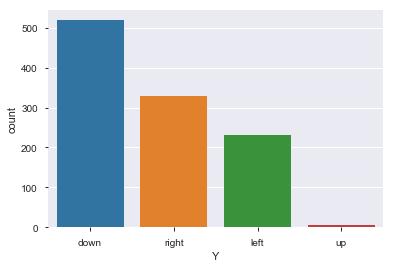

In [13]:
sns.countplot(data["Y"].map({1:"up", 2:"down", 3:"left", 4:"right"}))

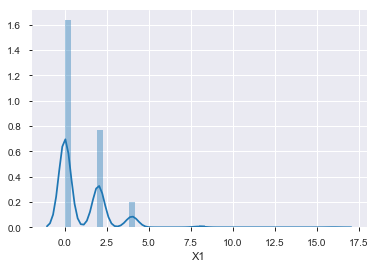

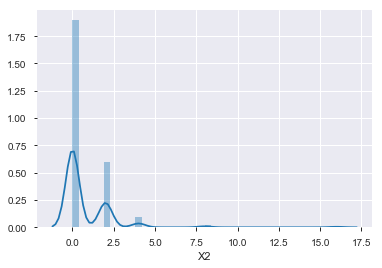

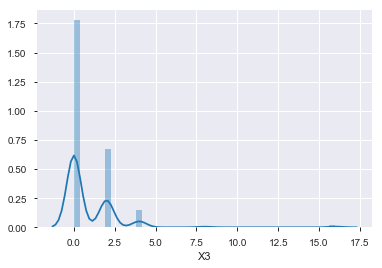

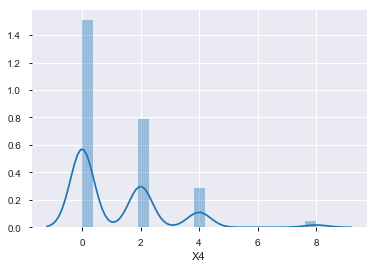

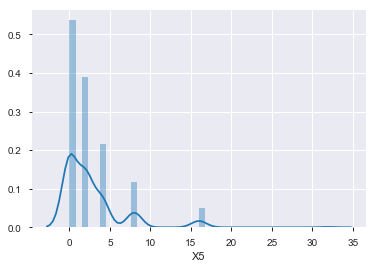

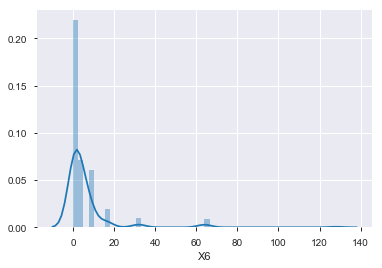

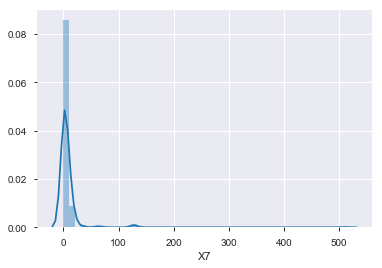

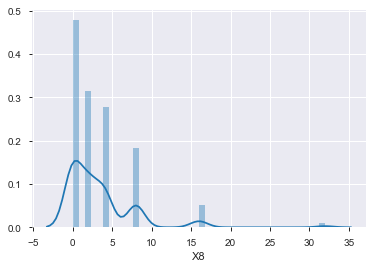

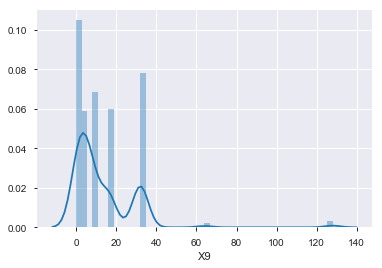

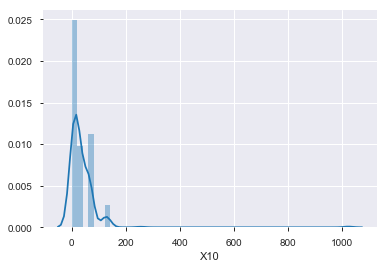

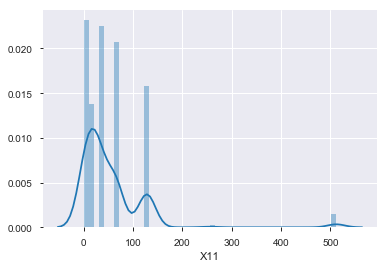

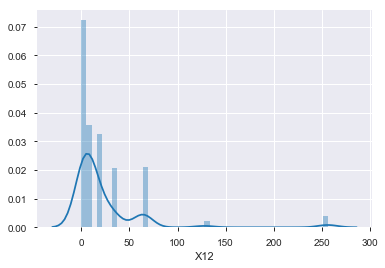

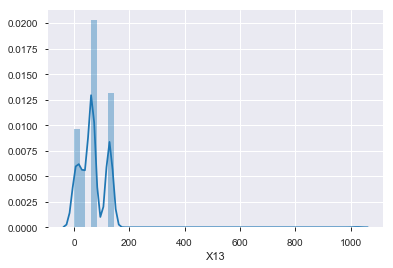

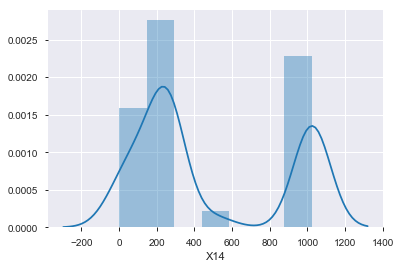

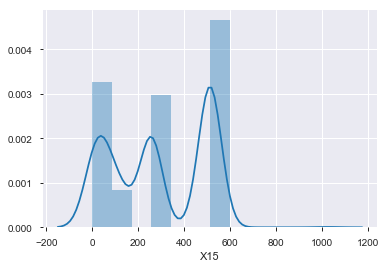

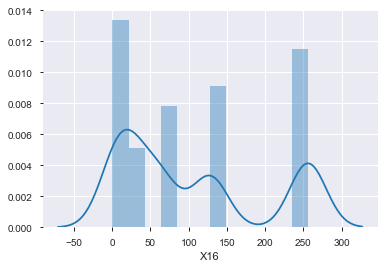

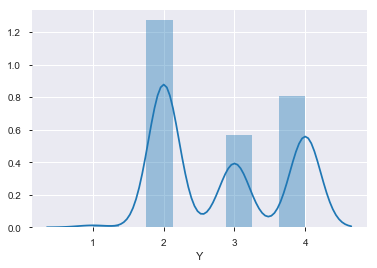

In [14]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

In [19]:
X = data.drop('Y', axis=1)
y = data['Y']
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,4.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0


In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [21]:
#Количество деревьев
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [15, 20, 30, 40, 45, 50]
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        temp_test_acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1)), 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 0.78% with 40 trees


In [22]:
plt.style.use('ggplot')

Text(0.5, 0, 'N_estimators')

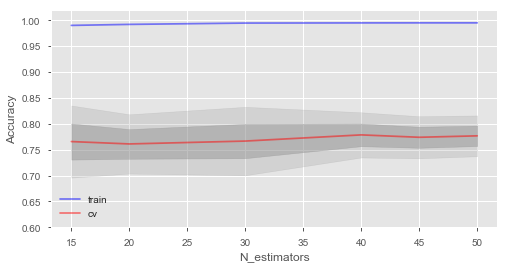

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

In [27]:
#Max depth
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [5,6,7,8,9,10, 11,12,13]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=40, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        temp_test_acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 78.40% with 10 max_depth


Text(0.5, 0, 'Max_depth')

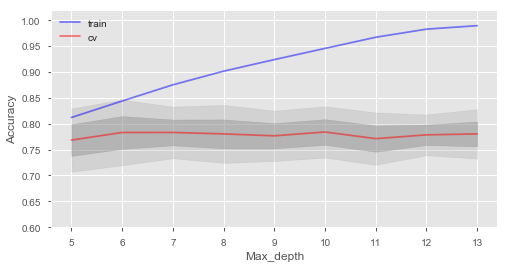

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

In [29]:
#Min_samples_leaf
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 2, 3, 5, 6]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=40, random_state=42, n_jobs=-1, 
                                 oob_score=True,max_depth=12, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        temp_test_acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 78.86% with 5 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

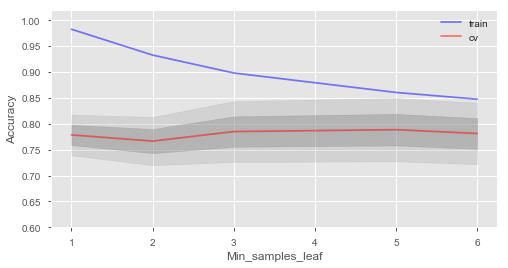

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

In [32]:
#Max features
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [1,3,2, 4, 5]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=40, max_depth=10, min_samples_leaf=5, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(accuracy_score(y_train, rfc.predict(X_train)))
        temp_test_acc.append(accuracy_score(y_test, rfc.predict(X_test)))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 78.58% with 4 max_features


Text(0.5, 0, 'Max_features')

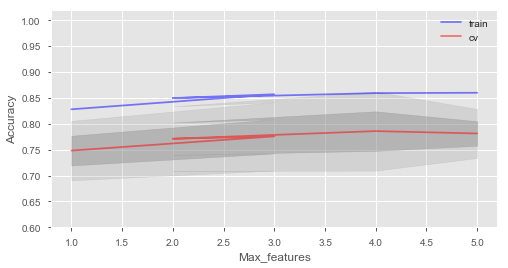

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.60,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

In [34]:
parameters = {'max_features': [3,4, 5, 6], 'min_samples_leaf': [4, 5, 6, 7, 8], 'max_depth': range(8, 14)}
rfc = RandomForestClassifier(n_estimators=40, random_state=42, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1, scoring='accuracy')
gcv.fit(X, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=40, n_jobs=-1,
                                              

In [35]:
gcv.best_score_

0.7922697927285084

In [36]:
gcv.best_params_

{'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 4}

In [37]:
dump(gcv, f"human_game_bot.joblib")

['human_game_bot.joblib']